In [1]:
from PIL import Image
import os 
import numpy as np
import matplotlib.pyplot as plt

# processing images(greying and resizing)

In [2]:
# Accessing the image folder:
img_folder_path=r"C:\Users\devbu\OneDrive\Attachments\Desktop\colour_images"

In [3]:
# Converting coloured images into grey images and resizing them into L by L pixels:

#create a list of files present in the img_folder:
file_names=os.listdir(img_folder_path)


In [4]:
L=100  #L by L image
for filename in file_names:
    #create path for files in the image folder
    file_path=os.path.join(img_folder_path,filename)
    # this is image name list for a file in the img folder 
    img_names=os.listdir(file_path)
    
    a=filename
    for imgname in img_names:
        # create a path for the image using it's name and path to its parent file
        image_path=os.path.join(file_path,imgname)
        
        # accessing the image using the image variable:
        image=Image.open(image_path)
        
        #conversion of image into grayscale image:
        grey_image=image.convert('L')
        
        # procedure for saving it with the same name but in a different folder
        # a is a variable iterating over file names in the main img folder
        
        if a=='ashish':
            path=r"C:\Users\devbu\OneDrive\Attachments\Desktop\grey_images\ashish"
        if a=='kartik':
            path=r"C:\Users\devbu\OneDrive\Attachments\Desktop\grey_images\kartik"
        if a=='Lucky':
            path=r"C:\Users\devbu\OneDrive\Attachments\Desktop\grey_images\Lucky"
        if a=='moin':
            path=r"C:\Users\devbu\OneDrive\Attachments\Desktop\grey_images\moin"
        if a=='others':
            path=r"C:\Users\devbu\OneDrive\Attachments\Desktop\grey_images\others"
        #path for saving the images 
        new_path=os.path.join(path,imgname)
        
        #resizing the image into (L,L)
        resized_image=grey_image.resize((L,L))
        
        #saving the resized image in new folder :
        resized_image.save(new_path)

# forming Dataset using images:

In [58]:
testimg='im30.jpg'
col_vect_list=[]
img_dict={}
#grey images folder path
grey_images_folder_path=r"C:\Users\devbu\OneDrive\Attachments\Desktop\grey_images"

#list of files 
file_names_grey=os.listdir(grey_images_folder_path)


for filename in file_names_grey:
    # path for file in folder
    file_path=os.path.join(grey_images_folder_path,filename)
    
    #image names in file 
    image_names=os.listdir(file_path)
   
    for imgname in image_names:
        # path to the image using image name and filepath
        image_path=os.path.join(file_path,imgname)
        
        image=Image.open(image_path)
        
        # removing these images (test images)
     
        if imgname==testimg:
            continue
       
        #for all other images (training set):
        
        else:    
            I=np.array(image)              # image to array (L,L)
            col_vect=I.reshape(-1,1)       #array to column vector
            col_vect_list.append(col_vect)
            
            #forming a dictionary for saving img col vect with names as key
            img_dict[imgname]=col_vect
            
#forming A(data matrix) by horizontally stacking column vectors 
A=np.hstack(col_vect_list)
shape=A.shape    
print(shape,"==(pixels,images)")
print(img_dict)

(10000, 45) ==(pixels,images)
{'im21.jpg': array([[178],
       [178],
       [179],
       ...,
       [238],
       [241],
       [243]], dtype=uint8), 'im22.jpg': array([[171],
       [172],
       [173],
       ...,
       [206],
       [206],
       [206]], dtype=uint8), 'im23.jpg': array([[173],
       [174],
       [176],
       ...,
       [176],
       [176],
       [176]], dtype=uint8), 'im24.jpg': array([[202],
       [202],
       [203],
       ...,
       [210],
       [204],
       [205]], dtype=uint8), 'im25.jpg': array([[177],
       [177],
       [178],
       ...,
       [210],
       [214],
       [213]], dtype=uint8), 'im26.jpg': array([[178],
       [178],
       [179],
       ...,
       [208],
       [210],
       [210]], dtype=uint8), 'im27.jpg': array([[176],
       [176],
       [177],
       ...,
       [218],
       [207],
       [188]], dtype=uint8), 'im28.jpg': array([[178],
       [178],
       [178],
       ...,
       [209],
       [209],
       [213]],

In [59]:
# function for obtaining key from image array:
def get_key(d,value):
    for key,val in d.items():
        
        a=np.all(val==value)
        if a==True:
            return key
                
    return 'none'

# function for obtaining image array from key

# Applying PCA to data matrix A :)

In [60]:
# Mean-center the data
N = A.shape[1]  # Number of images
M = A.shape[0]  # Number of pixels

# np.mean finds the mean along each row(bcoz axis=1) , Keepdims(keep dimensions that is gives a col vector)
mean_values = np.mean(A, axis=1, keepdims=True)

Mean_centred_matrix = A - mean_values
X = Mean_centred_matrix
print(mean_values)

[[114.4       ]
 [115.22222222]
 [115.46666667]
 ...
 [177.95555556]
 [174.95555556]
 [172.97777778]]


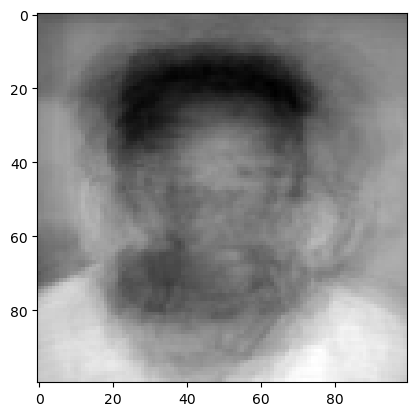

In [71]:
# plotting the mean-face :_: 
mean_face_array=mean_values.reshape(L,L)

plt.imshow(mean_face_array, cmap='gray')        #plots this image with pixel values ranging from 0-255(black-white)

In [62]:
#pca implimentation step by step:
#1 compute covariance matrix C=X.X^T and S=X^T.X 
C=np.dot(X,X.T)/N
S=np.dot(X.T,X)/N

#2 eigen-decomposition of the matrix S(it's computionally more easier than done for C itself) :)
lambda_,V=np.linalg.eig(S)

#3 obtain for C (as C and S are similar , so their eigenvalues are same.)
U=np.dot(X,V)    #here U and V are eigenvectors matrix for C and S resp.
                 #shape(U)= (pixels,N)
#4 normalizing vectors of U
U_normalized=np.zeros_like(U)
for i in range(N):
    norm=np.linalg.norm(U,axis=0 )
    U_normalized[:,i]=U[:,i]/norm[i]
    
#print(U_normalized)

Showing the eigenfaces


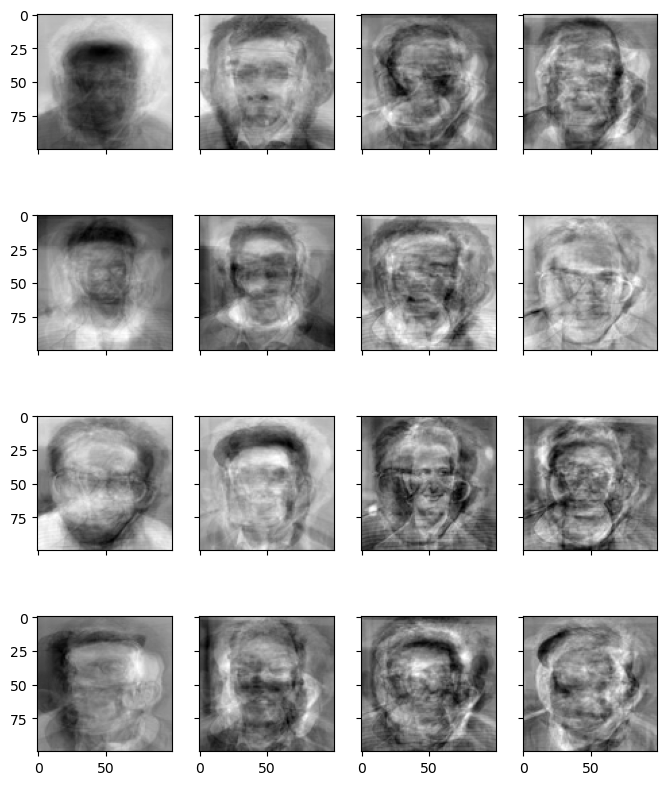

In [63]:
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(U_normalized[:,i].reshape(100,100), cmap="gray")
print("Showing the eigenfaces")
plt.show()
 

In [64]:

# Number of principal components to keep
k = 10  # Replace with the desired number of principal components

eigenvectors=np.zeros((M,k))
for i in range(k):
    eigenvectors[:,i]=U_normalized[:,i]
print(eigenvectors.shape)
#print(eigenvectors)


(10000, 10)


In [65]:
# Projecting the images on these k normalized eigenvectors::
img_coor=np.dot(np.transpose(eigenvectors),X)
print(img_coor.shape)


(10, 45)


In [66]:
#function for showing image::
Main_folder_path_grey=r"C:\Users\devbu\OneDrive\Attachments\Desktop\grey_images"
sub_folder_names_grey=os.listdir(Main_folder_path_grey)
def get_imshow(imgname):
    for subfoldername in sub_folder_names_grey:
        file_path=os.path.join(Main_folder_path_grey,subfoldername)
        file_names=os.listdir(file_path)
        for img_name in file_names:
            if img_name==imgname:
                path_to_test_img=os.path.join(file_path,imgname)
                test_img=Image.open(path_to_test_img)
                plt.title('Test image')
                return plt.imshow(test_img,cmap='gray')
                
                #return path_to_test_img
            else:
                continue
                
def get_imgpath(imgname):
    for subfoldername in sub_folder_names_grey:
        file_path=os.path.join(Main_folder_path_grey,subfoldername)
        file_names=os.listdir(file_path)
        for img_name in file_names:
            if img_name==imgname:
                path_to_test_img=os.path.join(file_path,imgname)
                test_img=Image.open(path_to_test_img)
                return path_to_test_img
            else:
                continue
    

In [67]:

#img=get_imshow(testimg)

#array of test_image:

test_img=Image.open(get_imgpath(testimg))
test_array=np.array(test_img)

# Step 2: Mean-center the test image
test_image_mean_centered = test_array.reshape(-1,1) - mean_values
#print(test_image_mean_centered .shape )


# Step 3: Project the test image onto the k eigenvectors
#test image projection on the eigenspace::
test_coor=np.dot(np.transpose(eigenvectors),test_image_mean_centered)
#print(test_coor.shape)


# Step 4: Compute the Euclidean distance between the projected test image and all projected training images
distances = np.linalg.norm(img_coor - test_coor,axis=0)
#print(distances.shape)


In [68]:
# Step 5: Find the index of the training image with the smallest distance to the test image
closest_image_index = np.argmin(distances)
closest_image = A[:, closest_image_index]
name=get_key(img_dict,closest_image.reshape(-1,1))



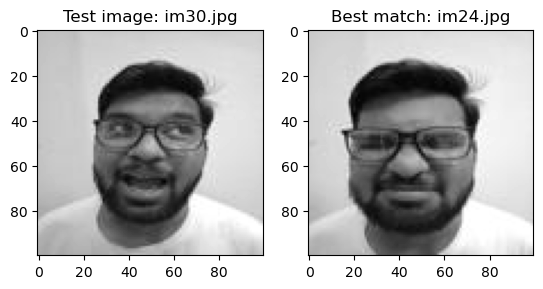

In [69]:
#plotting test and best match images together :
fig, axes = plt.subplots(1,2)

axes[0].imshow(test_array, cmap="gray")
axes[0].set_title(f"Test image: {testimg}")

axes[1].imshow(closest_image.reshape(L,L),cmap='gray')
axes[1].set_title(f'Best match: {name}')
plt.show()


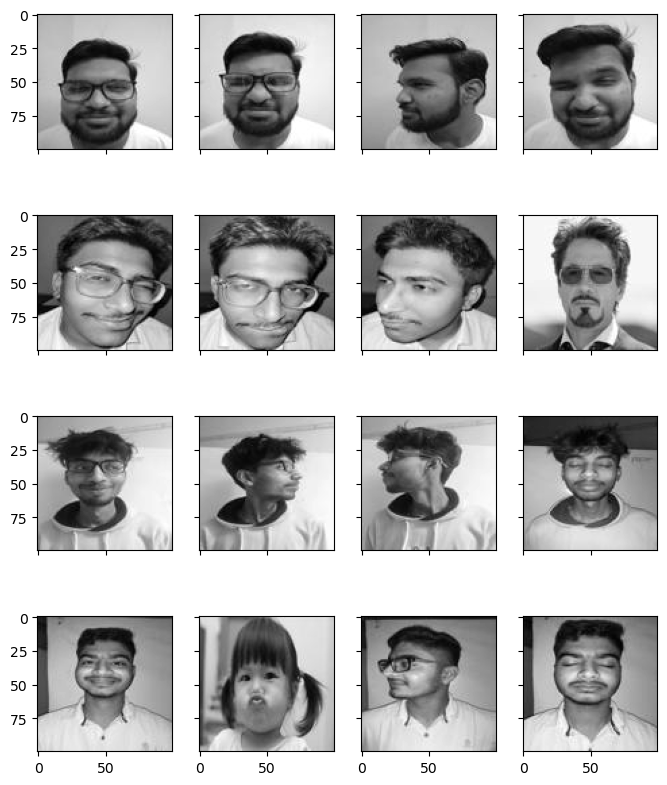

In [70]:
#
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
axes[0,0].imshow(img_dict['im21.jpg'].reshape(L,L),cmap="gray")
#axes[0,1].imshow(img2,cmap='gray')
list_=['im21.jpg','im24.jpg','im26.jpg','im29.jpg','im33.jpg','im32.jpg','im36.jpg','im42.jpg','im15.jpg','im16.jpg','im14.jpg','im11.jpg','im10.jpg','im45.jpg','im4.jpg','im2.jpg','im20.jpg','im41.jpg','im45.jpg','im42.jpg']
k=0
for i in range(4):
    for j in range(4):
        axes[i][j].imshow(img_dict[list_[k]].reshape(L,L),cmap='gray')
        k=k+1
    
